BZAN 542

Charles Liu

# Basics of Classification and Prediction

We will show examples of basic classifiction and prediction tasks. The tidyverse and caret are two very useful libraries.

In [1]:
library(tidyverse)
library(caret)
# optional: parallel computation
library(doParallel)
registerDoParallel()
getDoParWorkers()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loading required package: iterators

Loading required package: parallel



[1] 2

# Toyota Used Car Prices

     Price            Age              KM           FuelType          HP       
 Min.   : 4350   Min.   : 1.00   Min.   :     1   CNG   :  17   Min.   : 69.0  
 1st Qu.: 8450   1st Qu.:44.00   1st Qu.: 43000   Diesel: 155   1st Qu.: 90.0  
 Median : 9900   Median :61.00   Median : 63390   Petrol:1264   Median :110.0  
 Mean   :10731   Mean   :55.95   Mean   : 68533                 Mean   :101.5  
 3rd Qu.:11950   3rd Qu.:70.00   3rd Qu.: 87021                 3rd Qu.:110.0  
 Max.   :32500   Max.   :80.00   Max.   :243000                 Max.   :192.0  
    MetColor        Automatic             CC           Doors      
 Min.   :0.0000   Min.   :0.00000   Min.   :1300   Min.   :2.000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:1400   1st Qu.:3.000  
 Median :1.0000   Median :0.00000   Median :1600   Median :4.000  
 Mean   :0.6748   Mean   :0.05571   Mean   :1567   Mean   :4.033  
 3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:1600   3rd Qu.:5.000  
 Max.   :1.0000   Max.   :1.00000   Ma

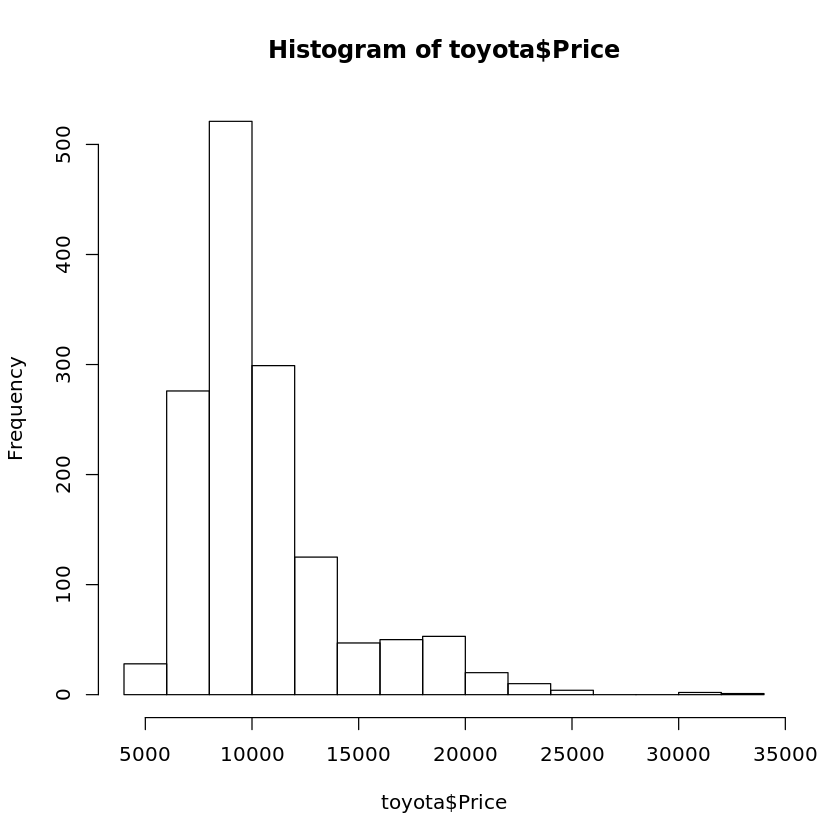

In [2]:
toyota <- read.csv("ToyotaCorolla.csv")
summary(toyota)
hist(toyota$Price)

In [3]:
# Indicator/dummy variable for the categorical variable FuelType
toyota$FuelTypeCNG=as.numeric(toyota$FuelType=="CNG")
toyota$FuelTypeDiesel=as.numeric(toyota$FuelType=="Diesel")
head(toyota)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,FuelTypeCNG,FuelTypeDiesel
,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,13500,23,46986,Diesel,90,1,0,2000,3,1165,0,1
2,13750,23,72937,Diesel,90,1,0,2000,3,1165,0,1
3,13950,24,41711,Diesel,90,1,0,2000,3,1165,0,1
4,14950,26,48000,Diesel,90,0,0,2000,3,1165,0,1
5,13750,30,38500,Diesel,90,0,0,2000,3,1170,0,1
6,12950,32,61000,Diesel,90,0,0,2000,3,1170,0,1


In [4]:
# New data with removing the categorical variable FuelType
auto=within(toyota, rm(FuelType))
head(auto)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelTypeCNG,FuelTypeDiesel
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,13500,23,46986,90,1,0,2000,3,1165,0,1
2,13750,23,72937,90,1,0,2000,3,1165,0,1
3,13950,24,41711,90,1,0,2000,3,1165,0,1
4,14950,26,48000,90,0,0,2000,3,1165,0,1
5,13750,30,38500,90,0,0,2000,3,1170,0,1
6,12950,32,61000,90,0,0,2000,3,1170,0,1


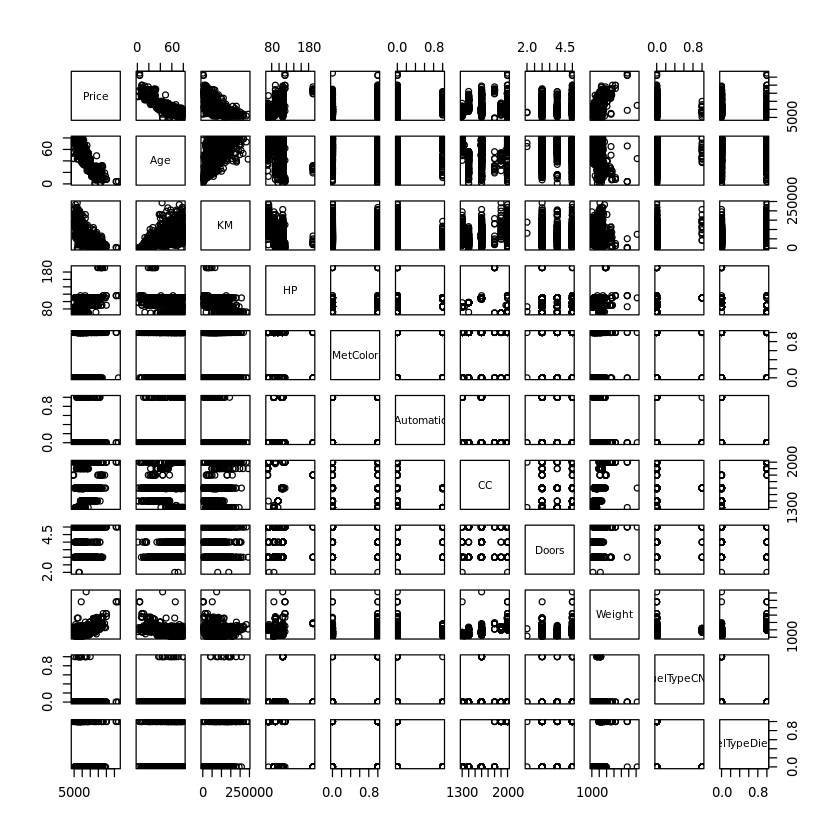

In [5]:
pairs(auto)

## Regression

In [6]:
model=lm(Price~., data=auto)
summary(model)


Call:
lm(formula = Price ~ ., data = auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-10642.3   -737.7      3.1    731.3   6451.5 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.681e+03  1.219e+03  -2.199 0.028036 *  
Age            -1.220e+02  2.602e+00 -46.889  < 2e-16 ***
KM             -1.621e-02  1.313e-03 -12.347  < 2e-16 ***
HP              6.081e+01  5.756e+00  10.565  < 2e-16 ***
MetColor        5.716e+01  7.494e+01   0.763 0.445738    
Automatic       3.303e+02  1.571e+02   2.102 0.035708 *  
CC             -4.174e+00  5.453e-01  -7.656 3.53e-14 ***
Doors          -7.776e+00  4.006e+01  -0.194 0.846129    
Weight          2.001e+01  1.203e+00  16.629  < 2e-16 ***
FuelTypeCNG    -1.121e+03  3.324e+02  -3.372 0.000767 ***
FuelTypeDiesel  2.269e+03  4.394e+02   5.164 2.75e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1316 on 1425 degrees of freedom
Multiple R-squar

## Model Evaluation

In [7]:
nTotal=nrow(auto)

nTrain=1000
nTest=nTotal-nTrain

# random selection for training and testing data
# optionally, fixing the seed value guarantees the same results in repeated runs
# set.seed(1)
train=sample(nTotal, nTrain)

## training
model=lm(Price~., data=auto[train,])
summary(model)

## testing
pred=predict(model, newdata=auto[-train,])

# evaluation with root mean square error
diff=auto$Price[-train]-pred
error=sqrt(sum(diff**2)/nTest)

cat(sprintf('nTrain=%d, nTest=%d, error=%f\n', nTrain, nTest, error))


Call:
lm(formula = Price ~ ., data = auto[train, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-11020.7   -746.4      4.0    719.7   6223.2 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -3.159e+03  1.534e+03  -2.060 0.039688 *  
Age            -1.206e+02  3.146e+00 -38.323  < 2e-16 ***
KM             -1.668e-02  1.597e-03 -10.442  < 2e-16 ***
HP              5.937e+01  7.718e+00   7.692 3.49e-14 ***
MetColor        6.292e+01  9.152e+01   0.688 0.491928    
Automatic       2.435e+02  1.899e+02   1.282 0.200077    
CC             -4.289e+00  6.946e-01  -6.175 9.67e-10 ***
Doors          -2.093e+01  4.892e+01  -0.428 0.668873    
Weight          2.077e+01  1.532e+00  13.556  < 2e-16 ***
FuelTypeCNG    -6.929e+02  4.012e+02  -1.727 0.084519 .  
FuelTypeDiesel  2.142e+03  5.721e+02   3.743 0.000192 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1334 on 989 degrees of freedom
Multiple

nTrain=1000, nTest=436, error=1279.498651


In [8]:
# cross-validation (repeated)
nRepeats=10
error=numeric(length=nRepeats)
for(n in seq(nRepeats)){
    train=sample(nTotal, nTrain)
    model=lm(Price~., data=auto[train,])
    pred=predict(model, newdata=auto[-train,])
    diff=auto$Price[-train]-pred
    error[n]=sqrt(sum(diff**2)/nTest)
    cat(sprintf('Repeat %02d, nTrain=%d, nTest=%d, error=%f\n',
                n, nTrain, nTest, error[n]))
}
cat(sprintf('Error mean=%f, sd=%f\n', mean(error), sd(error)))

Repeat 01, nTrain=1000, nTest=436, error=1674.957195
Repeat 02, nTrain=1000, nTest=436, error=1339.662211
Repeat 03, nTrain=1000, nTest=436, error=1319.928215
Repeat 04, nTrain=1000, nTest=436, error=1422.353432
Repeat 05, nTrain=1000, nTest=436, error=1226.112270
Repeat 06, nTrain=1000, nTest=436, error=1367.519141
Repeat 07, nTrain=1000, nTest=436, error=1263.228326
Repeat 08, nTrain=1000, nTest=436, error=1425.548387
Repeat 09, nTrain=1000, nTest=436, error=1189.277505
Repeat 10, nTrain=1000, nTest=436, error=1240.310125
Error mean=1346.889681, sd=140.831736


In [9]:
# cross-validation (10-fold)
nFolds=10
nFold=sample(nFolds, nTotal, replace=TRUE)
error=numeric(length=nFolds)
for(fold in seq(nFolds)){
    train=nFold!=fold
    test=!train
    nTrain=sum(train)
    nTest=nTotal-nTrain
    model=lm(Price~., data=auto[train,])
    pred=predict(model, newdata=auto[test,])
    diff=auto$Price[test]-pred
    error[fold]=sqrt(sum(diff**2)/nTest)
    cat(sprintf('Fold %02d, nTrain=%d, nTest=%d, error=%f\n',
                fold, nTrain, nTest, error[fold]))
}
cat(sprintf('Error mean=%f, sd=%f\n', mean(error), sd(error)))

Fold 01, nTrain=1311, nTest=125, error=1305.603441
Fold 02, nTrain=1315, nTest=121, error=1193.451889
Fold 03, nTrain=1283, nTest=153, error=1738.230817
Fold 04, nTrain=1295, nTest=141, error=1451.695244
Fold 05, nTrain=1282, nTest=154, error=1351.351319
Fold 06, nTrain=1278, nTest=158, error=1286.562535
Fold 07, nTrain=1265, nTest=171, error=1470.889748
Fold 08, nTrain=1314, nTest=122, error=1207.099853
Fold 09, nTrain=1290, nTest=146, error=1134.366118
Fold 10, nTrain=1291, nTest=145, error=1222.414460
Error mean=1336.166542, sd=178.719760


In [10]:
## cross-validation (leave one out)
pred=numeric(length=nTotal)
for(n in seq(nTotal)) {
  model=lm(Price~., data=auto[-n,])
  pred[n]=predict(model, newdata=auto[n,])
}
diff=auto$Price-pred
error=sqrt(mean(diff**2))
cat(sprintf('Error=%f\n', error))

Error=1354.508727


Can you try the above with different data/features/parameters? and compare the results? and what are your conclusions?

# Model Evaluation with Caret

In [11]:
fit <- train(Price ~ ., data=auto, method='lm', trControl = trainControl(method='cv', number=10))
fit

Linear Regression 

1436 samples
  10 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1292, 1294, 1292, 1291, 1292, 1293, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1352.807  0.8621974  962.7559

Tuning parameter 'intercept' was held constant at a value of TRUE

# Nearest Neighbor

In [12]:
train(Price ~ ., data=auto, method='knn', trControl = trainControl(method = "cv", number = 10))

k-Nearest Neighbors 

1436 samples
  10 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1292, 1292, 1293, 1293, 1292, 1294, ... 
Resampling results across tuning parameters:

  k  RMSE      Rsquared   MAE     
  5  2672.117  0.4592216  1890.918
  7  2666.800  0.4601076  1887.691
  9  2658.329  0.4644721  1890.308

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 9.

In [13]:
scale_columns=names(auto)!='Price'
scale_auto=auto
scale_auto[, scale_columns]=scale(scale_auto[, scale_columns])
apply(scale_auto, 2, mean)
apply(scale_auto, 2, sd)

Price            Age             KM             HP       MetColor 
  1.073082e+04  -1.824110e-16   1.465483e-16  -3.349692e-16  -4.455746e-17 
     Automatic             CC          Doors         Weight    FuelTypeCNG 
 -5.534395e-18   3.188128e-16  -3.711466e-16  -9.887925e-16  -7.769184e-18 
FuelTypeDiesel 
  1.278090e-18

Price            Age             KM             HP       MetColor 
      3626.965          1.000          1.000          1.000          1.000 
     Automatic             CC          Doors         Weight    FuelTypeCNG 
         1.000          1.000          1.000          1.000          1.000 
FuelTypeDiesel 
         1.000

In [14]:
train(Price ~ ., data=scale_auto, method='knn', trControl = trainControl(method = "cv", number = 10))

k-Nearest Neighbors 

1436 samples
  10 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1292, 1293, 1293, 1292, 1293, 1292, ... 
Resampling results across tuning parameters:

  k  RMSE      Rsquared   MAE     
  5  1366.747  0.8561855  980.4344
  7  1366.887  0.8555234  972.3092
  9  1363.027  0.8578782  970.9230

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 9.

In [15]:
fit <- train(Price ~ .,
    data = scale_auto ,
    method = "knn",
    trControl = trainControl(method = "cv", number = 10),
    tuneGrid = data.frame(k=seq(from=1, to=10, by=1))
)
fit

k-Nearest Neighbors 

1436 samples
  10 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1293, 1292, 1292, 1293, 1292, 1292, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE      
   1  1509.598  0.8317287  1116.5472
   2  1365.299  0.8592003  1011.8221
   3  1360.095  0.8589234   988.8948
   4  1338.665  0.8628771   982.5747
   5  1345.294  0.8614932   975.7562
   6  1352.561  0.8593326   969.6717
   7  1343.590  0.8611861   965.3205
   8  1348.645  0.8602818   970.8865
   9  1345.598  0.8614928   973.3191
  10  1351.548  0.8606474   978.3483

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 4.

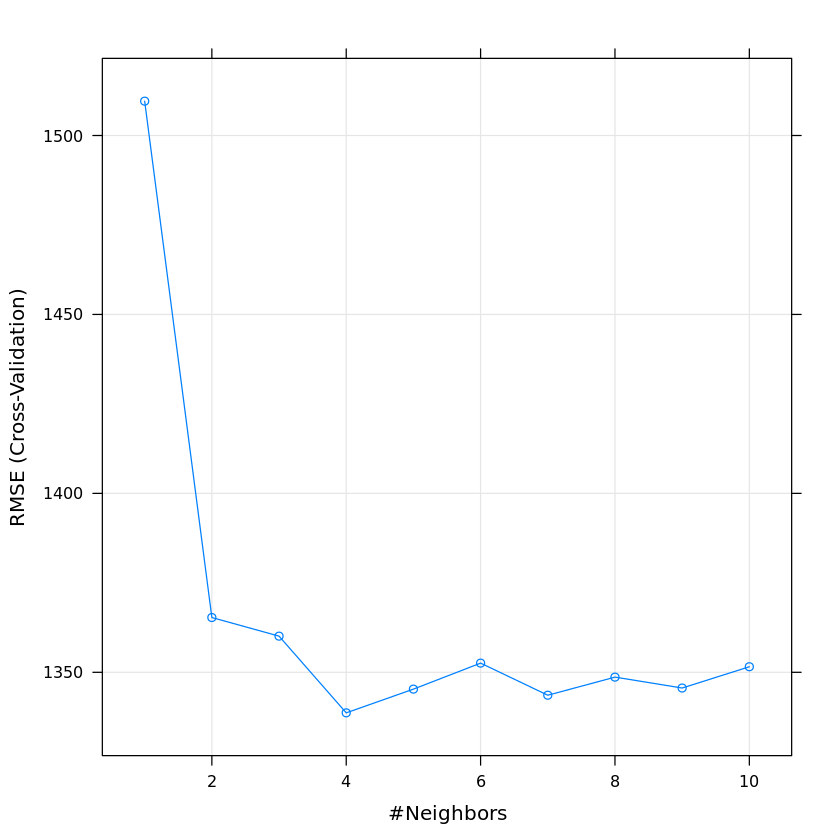

In [16]:
plot(fit)

# Logistic Regression

In [17]:
## analyzing individual observations
dpen <- read.csv("DeathPenalty.csv")
head(dpen)

,Agg,VRace,Death
,<int>,<int>,<int>
1,1,1,1
2,1,1,1
3,1,1,0
4,1,1,0
5,1,1,0
6,1,1,0


In [18]:
dpen$Death <- as.factor(dpen$Death)
head(dpen)

,Agg,VRace,Death
,<int>,<int>,<fct>
1,1,1,1
2,1,1,1
3,1,1,0
4,1,1,0
5,1,1,0
6,1,1,0


In [19]:
summary(dpen)

      Agg            VRace        Death  
 Min.   :1.000   Min.   :0.0000   0:303  
 1st Qu.:1.000   1st Qu.:0.0000   1: 59  
 Median :1.000   Median :0.0000          
 Mean   :1.856   Mean   :0.3591          
 3rd Qu.:2.000   3rd Qu.:1.0000          
 Max.   :6.000   Max.   :1.0000          

In [20]:
model=glm(Death~VRace+Agg,family=binomial,data=dpen)
summary(model)


Call:
glm(formula = Death ~ VRace + Agg, family = binomial, data = dpen)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7526  -0.2658  -0.1083  -0.1083   3.2069  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -6.6760     0.7574  -8.814  < 2e-16 ***
VRace         1.8106     0.5361   3.377 0.000732 ***
Agg           1.5397     0.1867   8.246  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 321.88  on 361  degrees of freedom
Residual deviance: 113.48  on 359  degrees of freedom
AIC: 119.48

Number of Fisher Scoring iterations: 7


In [21]:
## plotting probability of getting death penalty as a function of aggravation
## separately for black (in black) and white (in red) victim
agg=seq(1,6,0.01)
dataBlack=data.frame(VRace=0, Agg=agg)
fitBlack=predict(model, dataBlack, type="response")
dataWhite=data.frame(VRace=1, Agg=agg)
fitWhite=predict(model, dataWhite, type="response")

In [22]:
summary(fitBlack)
summary(fitWhite)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005845 0.038726 0.216334 0.341943 0.654169 0.928375 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0347  0.1976  0.6280  0.5649  0.9204  0.9875 

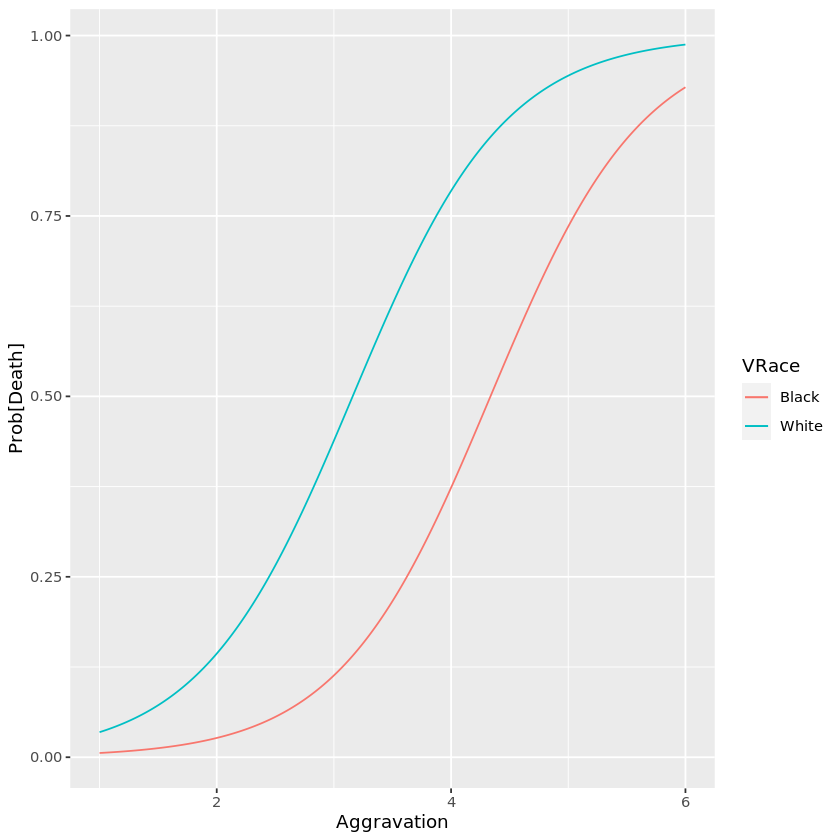

In [23]:
ggplot(data = data.frame(agg, fitBlack, fitWhite), aes(x = agg)) +
    geom_line(aes(y = fitBlack, color = 'Black')) +
    geom_line(aes(y = fitWhite, color = 'White')) +
    xlab('Aggravation') + ylab('Prob[Death]') +
    scale_color_discrete(name = 'VRace')

In [24]:
# cross-validation (10-fold)
nTotal=nrow(dpen)
nFolds=10
nFold=sample(nFolds, nTotal, replace=TRUE)
error=numeric(length=nFolds)
for(fold in seq(nFolds)){
    train=nFold!=fold
    test=!train
    nTrain=sum(train)
    nTest=nTotal-nTrain
    model=glm(Death~VRace+Agg,family=binomial, data=dpen[train,])
    pred=predict(model, newdata=dpen[test,])
    diff=(dpen$Death[test]=='1')==(pred>0)
    error[fold]=sum(diff)/nTest
    cat(sprintf('Fold %02d, nTrain=%d, nTest=%d, error=%f\n',
                fold, nTrain, nTest, error[fold]))
}
cat(sprintf('Error mean=%f, sd=%f\n', mean(error), sd(error)))

Fold 01, nTrain=333, nTest=29, error=0.931034
Fold 02, nTrain=329, nTest=33, error=0.969697
Fold 03, nTrain=323, nTest=39, error=0.897436
Fold 04, nTrain=332, nTest=30, error=0.933333
Fold 05, nTrain=323, nTest=39, error=0.923077
Fold 06, nTrain=315, nTest=47, error=1.000000
Fold 07, nTrain=324, nTest=38, error=0.921053
Fold 08, nTrain=326, nTest=36, error=0.972222
Fold 09, nTrain=323, nTest=39, error=0.871795
Fold 10, nTrain=330, nTest=32, error=0.968750
Error mean=0.938840, sd=0.038826


In [25]:
train(Death~VRace+Agg, data=dpen, method='glm', family='binomial', trControl = trainControl(method='cv', number=10))

Generalized Linear Model 

362 samples
  2 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 326, 327, 326, 325, 325, 326, ... 
Resampling results:

  Accuracy   Kappa    
  0.9394852  0.7524406


# Decision Tree

In [26]:
data(Zoo, package="mlbench")
head(Zoo)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<lgl>,<lgl>,<lgl>,<fct>
aardvark,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,FALSE,FALSE,TRUE,mammal
antelope,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal
bass,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,0,TRUE,FALSE,FALSE,fish
bear,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,FALSE,FALSE,TRUE,mammal
boar,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal
buffalo,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal


In [27]:
summary(Zoo)

    hair          feathers          eggs            milk        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:58        FALSE:81        FALSE:42        FALSE:60       
 TRUE :43        TRUE :20        TRUE :59        TRUE :41       
                                                                
                                                                
                                                                
                                                                
  airborne        aquatic         predator        toothed       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:77        FALSE:65        FALSE:45        FALSE:40       
 TRUE :24        TRUE :36        TRUE :56        TRUE :61       
                                                                
                                                                
                                                                
                         

In [28]:
library(rpart)

In [29]:
rtree <- rpart(type~., data=Zoo)
rtree

n= 101 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 101 60 mammal (0.41 0.2 0.05 0.13 0.04 0.079 0.099)  
   2) milk>=0.5 41  0 mammal (1 0 0 0 0 0 0) *
   3) milk< 0.5 60 40 bird (0 0.33 0.083 0.22 0.067 0.13 0.17)  
     6) feathers>=0.5 20  0 bird (0 1 0 0 0 0 0) *
     7) feathers< 0.5 40 27 fish (0 0 0.12 0.33 0.1 0.2 0.25)  
      14) fins>=0.5 13  0 fish (0 0 0 1 0 0 0) *
      15) fins< 0.5 27 17 mollusc.et.al (0 0 0.19 0 0.15 0.3 0.37)  
        30) backbone>=0.5 9  4 reptile (0 0 0.56 0 0.44 0 0) *
        31) backbone< 0.5 18  8 mollusc.et.al (0 0 0 0 0 0.44 0.56) *

In [30]:
summary(rtree)

Call:
rpart(formula = type ~ ., data = Zoo)
  n= 101 

          CP nsplit rel error    xerror       xstd
1 0.33333333      0 1.0000000 1.0000000 0.08225373
2 0.21666667      1 0.6666667 0.6666667 0.08191869
3 0.16666667      2 0.4500000 0.5500000 0.07855964
4 0.08333333      3 0.2833333 0.3500000 0.06797398
5 0.01000000      4 0.2000000 0.3166667 0.06545937

Variable importance
    milk     eggs     hair  toothed feathers     legs  catsize     fins 
      15       14       13       12        8        8        7        6 
backbone     tail airborne breathes 
       5        4        4        3 

Node number 1: 101 observations,    complexity param=0.3333333
  predicted class=mammal         expected loss=0.5940594  P(node) =1
    class counts:    41    20     5    13     4     8    10
   probabilities: 0.406 0.198 0.050 0.129 0.040 0.079 0.099 
  left son=2 (41 obs) right son=3 (60 obs)
  Primary splits:
      milk     < 0.5 to the right, improve=29.59307, (0 missing)
      eggs     < 0

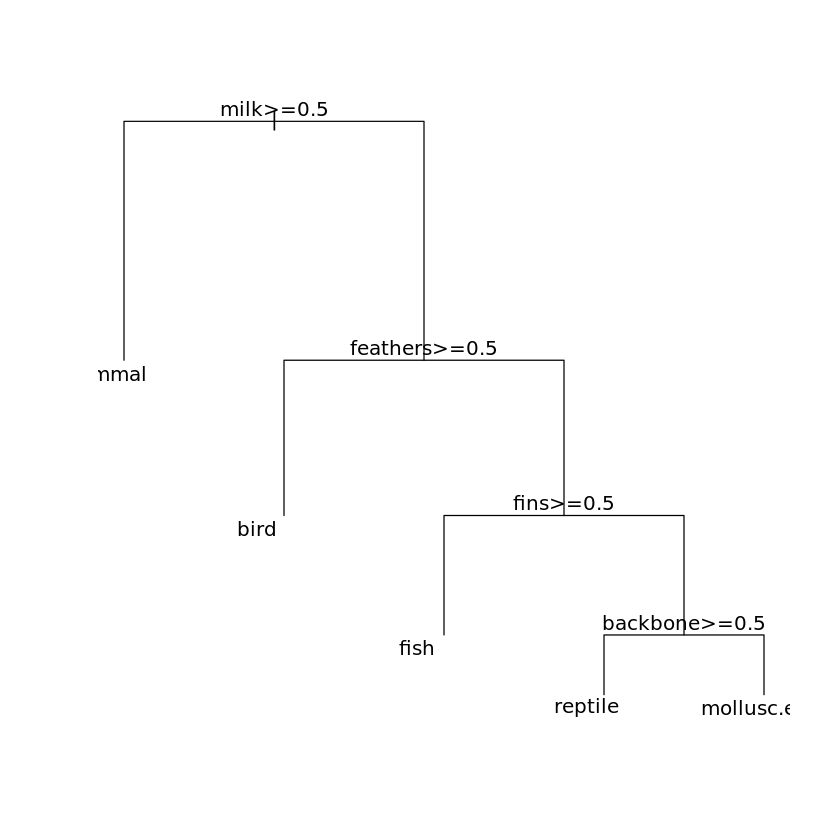

In [31]:
plot(rtree)
text(rtree,digits=2)

In [32]:
library(rpart.plot)

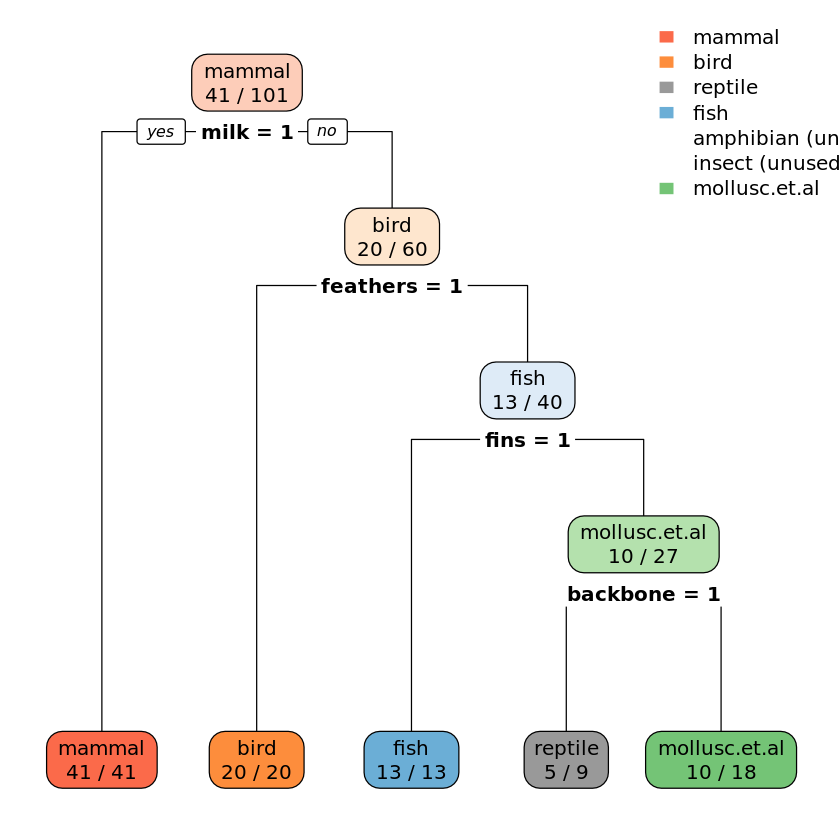

In [33]:
rpart.plot(rtree, extra = 2)

In [34]:
train(type~., data=Zoo, method='rpart', trControl = trainControl(method = "cv", number = 10))

CART 

101 samples
 16 predictor
  7 classes: 'mammal', 'bird', 'reptile', 'fish', 'amphibian', 'insect', 'mollusc.et.al' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 92, 90, 91, 93, 89, 91, ... 
Resampling results across tuning parameters:

  cp         Accuracy   Kappa     
  0.1666667  0.7557323  0.67303181
  0.2166667  0.6691414  0.55181431
  0.3333333  0.4444444  0.07527473

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.1666667.

In [35]:
fit <- train(type ~ .,
    data = Zoo ,
    method = "rpart",
    trControl = trainControl(method = "cv", number = 10),
    tuneGrid = data.frame(cp=seq(from=0.05, to=0.25, by=0.05))
)
fit

CART 

101 samples
 16 predictor
  7 classes: 'mammal', 'bird', 'reptile', 'fish', 'amphibian', 'insect', 'mollusc.et.al' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 92, 90, 91, 91, 91, 90, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa    
  0.05  0.8707071  0.8291900
  0.10  0.8325253  0.7778759
  0.15  0.8325253  0.7778759
  0.20  0.7332323  0.6418801
  0.25  0.6057576  0.4505428

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.05.

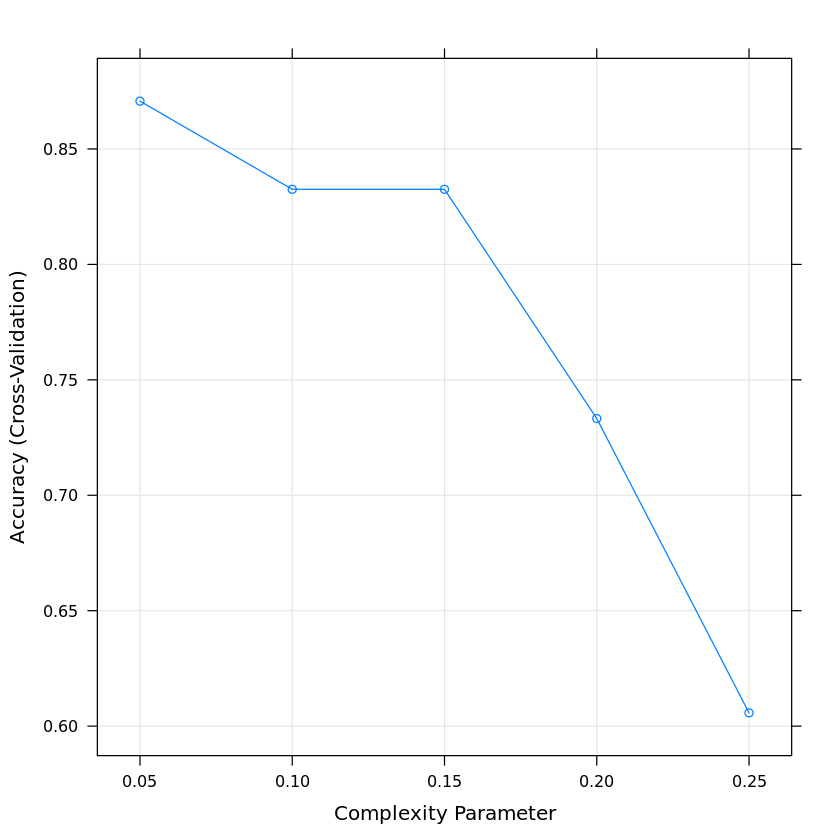

In [36]:
plot(fit)

# Nearest Neighbor with the class library

In [37]:
library(class)  ## this will load knn

#set.seed(1) # to make the calculations reproducible in repeated runs

nTotal=nrow(iris)
nTrain=120
train <- sample(nTotal, nTrain)

## Standardization of the data is preferable
## especially if units of the features are quite different
x=scale(iris[,c(1,2)])
y=iris$Species

nearest1=knn(train=x[train,],test=x[-train,],cl=y[train],k=1)
nearest5=knn(train=x[train,],test=x[-train,],cl=y[train],k=5)

## calculate the proportion of correct classifications on this one 
## training set

sum(y[-train]==nearest1)/(nTotal-nTrain)
sum(y[-train]==nearest5)/(nTotal-nTrain)

[1] 0.7

[1] 0.8

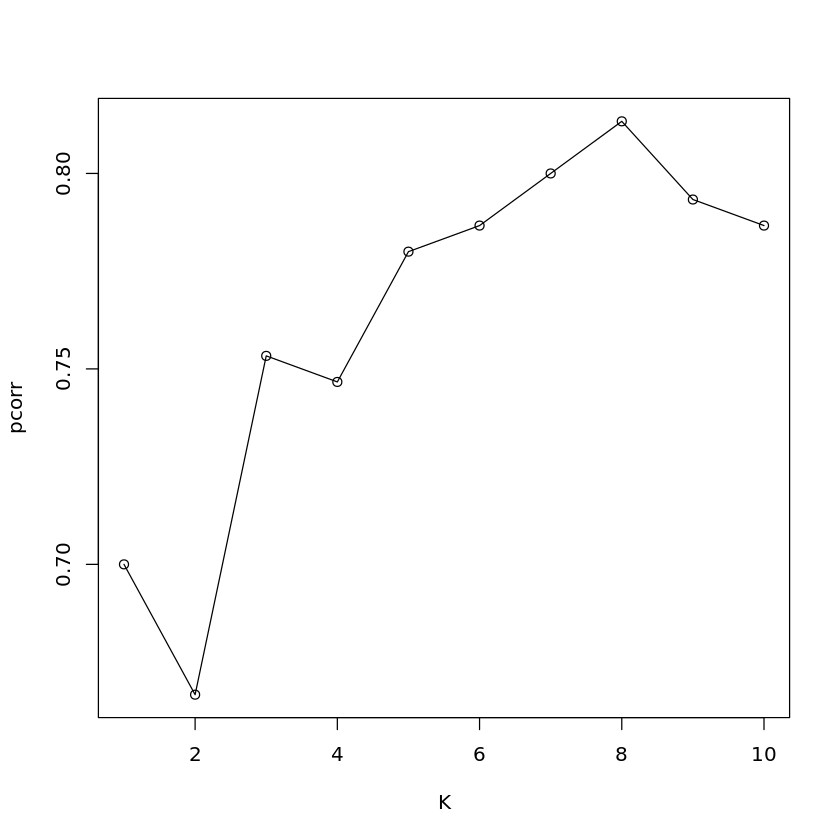

In [38]:
## cross-validation (leave one out)
pcorr=numeric(length=10)
for (k in 1:10) {
  pred=knn.cv(x,y,k)
  pcorr[k]=sum(y==pred)/nTotal
}
plot(pcorr,xlab='K', type="o")